In [1]:
import pandas as pd  
import numpy as np  
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
from datetime import datetime

In [78]:
train_df = pd.read_csv('/Users/agnesk/Desktop/train 2.csv') 
train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [80]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
train_df.tail(7) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [82]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [83]:
print(train_df.columns.values) 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [84]:
train_df.shape 

(891, 12)

In [85]:
train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
train_df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mr. John Borland Jr",male,347082,B96 B98,S
freq,1,577,7,4,644


In [87]:
train_df.describe(include='all') 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Thayer, Mr. John Borland Jr",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [88]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [89]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False) 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [90]:
train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived',ascending=True) 

,Age,Survived
77,61.00,0.000000
54,40.50,0.000000
30,23.50,0.000000
26,20.50,0.000000
37,28.50,0.000000
86,74.00,0.000000
40,30.50,0.000000
60,45.50,0.000000
19,14.50,0.000000
61,46.00,0.000000


In [91]:
count_df=train_df['Age'].value_counts(ascending=False) 
count_df.head(5) 

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [92]:
col_lst = ["Name","Sex","Age","Pclass", "Survived"]
train_df = train_df[col_lst] 

train_df[col_lst].head(10) 

,Name,Sex,Age,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1
2,"Heikkinen, Miss. Laina",female,26.0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1
4,"Allen, Mr. William Henry",male,35.0,3,0
5,"Moran, Mr. James",male,NaN,3,0
6,"McCarthy, Mr. Timothy J",male,54.0,1,0
7,"Palsson, Master. Gosta Leonard",male,2.0,3,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,3,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,2,1


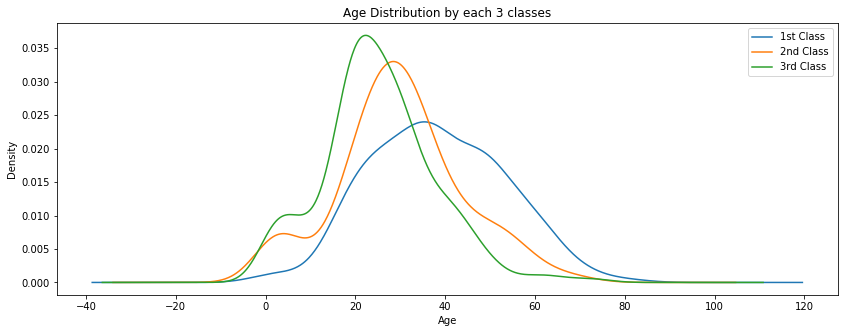

In [134]:
fig = plt.figure(figsize=(14,5)) 

train_df.Age[train_df.Pclass == 1].plot(kind='density')    
train_df.Age[train_df.Pclass == 2].plot(kind='density')
train_df.Age[train_df.Pclass == 3].plot(kind='density')

plt.xlabel("Age")    
plt.title("Age Distribution by each 3 classes")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

Text(0.5, 1.0, 'Survival (1 = Survived, 0 = Died)')

<Figure size 1008x648 with 0 Axes>

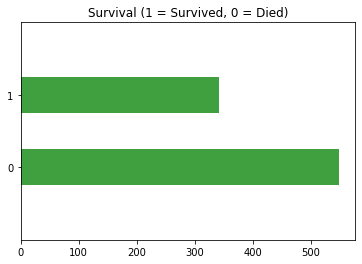

In [110]:
fig = plt.figure(figsize=(14,9))
fig, ax = plt.subplots()
train_df.Survived.value_counts().plot(kind='barh', color="green", alpha=.75)
ax.set_ylim(-1, len(train_df.Survived.value_counts())) 
plt.title("Survival (1 = Survived, 0 = Died)") 

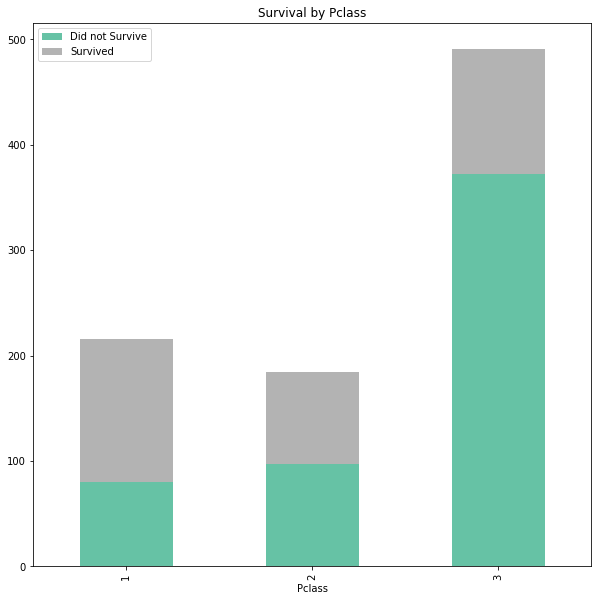

In [133]:
pclass_survived = train_df.groupby(['Pclass','Survived'],as_index = False).size().unstack()
plot_pclass_survival = pclass_survived.plot(kind = 'bar',stacked =True , colormap = 'Set2',figsize = (10,10),title = 'Survival by Pclass')
plot_pclass_survival.legend(['Did not Survive','Survived'],loc ='best')
plt.show() 

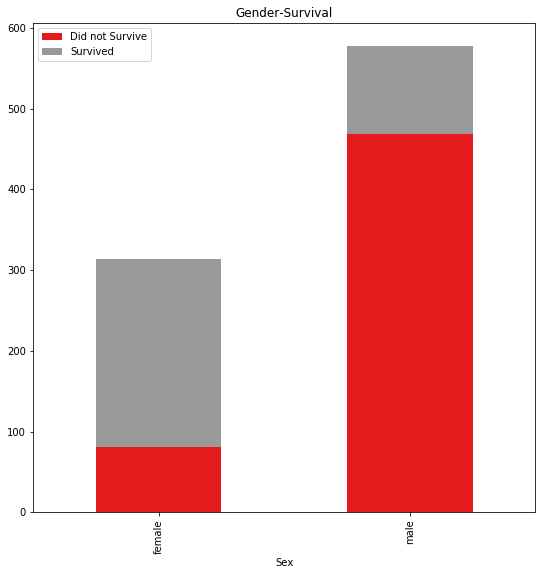

In [113]:
pgender_survived = train_df.groupby(['Sex','Survived'],as_index = False).size().unstack()
plot_pgender_survival = pgender_survived.plot(kind = 'bar',stacked =True , colormap = 'Set1',figsize = (9,9),title = 'Gender-Survival')
plot_pgender_survival.legend(['Did not Survive','Survived'],loc ='best') 